In [2]:
import numpy as np
import pyqsp
from pyqsp import angle_sequence, response
from pyqsp.poly import polynomial_generators, PolyTaylorSeries
from typing import Dict
import numpy as np
from stateprep_qet.utils import h, h_hat

In [3]:
EXP_RATE = 1  # decay rate of the Gaussian
F = lambda x: np.exp(-EXP_RATE * (x**2))  # Gaussian
# F = lambda x: np.tanh(x)
MIN = -2  # min x
MAX = 2  # max x

H = h(f=F, min=MIN, max=MAX)
POLY_FUNC = h_hat(h=H, h_max=F(0))
# POLY_FUNC = F
POLY_DEGREE = 25
POLY_MAX_SCALE = 1

POLY_EVEN = lambda x: (POLY_FUNC(x) + POLY_FUNC(-x))
POLY_ODD = lambda x: (POLY_FUNC(x) - POLY_FUNC(-x))
print("h_max", F(0))

h_max 1.0


### Finding phase angles for the even polynomial

Get Chebychev coefficients for the even parts of the polynomial

In [4]:
poly_even = PolyTaylorSeries().taylor_series(
    func=POLY_EVEN,
    degree=POLY_DEGREE+3,
    max_scale=POLY_MAX_SCALE,
    chebyshev_basis=True,
    cheb_samples=(POLY_DEGREE+3),
)

[PolyTaylorSeries] (Cheb) max 1.0000002010996416 is at 0.4794252726967754: normalizing
[PolyTaylorSeries] (Cheb) average error = 2.309258973342341e-07 in the domain [-1, 1] using degree 28


Compute phase angles

In [5]:
(phiset_even) = angle_sequence.QuantumSignalProcessingPhases(
    poly_even, signal_operator="Wx", method="laurent", measurement="x"
)
print(phiset_even)
print("len(phiset_even):", len(phiset_even))

[-1.5707638052650053, -1.739611231665883e-05, 3.497427370313666e-05, 6.197302579336039e-06, -0.0006122100531238406, 0.002279801990280106, -0.0014437937270845858, -0.013232527724066578, 0.041755260631090696, -0.03069907950469042, -0.09369728174206826, 0.24876290976133397, -0.1643884044848849, -0.21625903240061795, 0.45500585646512803, -0.21625903240063304, -0.1643884044848709, 0.24876290976133375, -0.09369728174207692, -0.030699079504683535, 0.04175526063109025, -0.013232527724069687, -0.0014437937270821433, 0.002279801990279884, -0.0006122100531245067, 6.197302580002173e-06, 3.4974273702914616e-05, -1.7396112316436785e-05, 3.25215298914161e-05]
len(phiset_even): 29


Plot

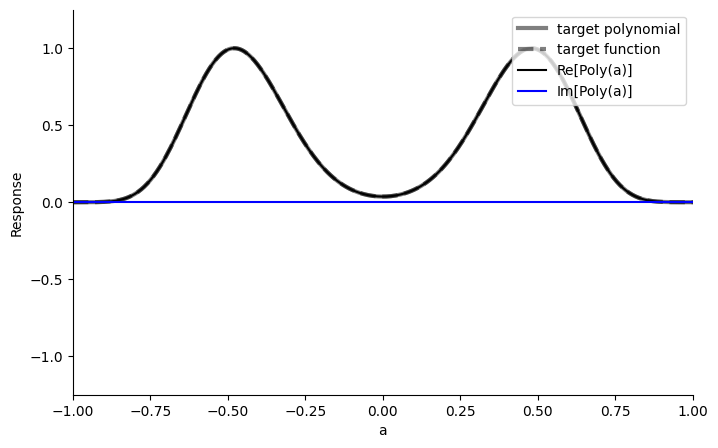

In [6]:
response.PlotQSPResponse(
    np.append(phiset_even, []), pcoefs=poly_even, target=lambda x: POLY_MAX_SCALE * POLY_EVEN(x)
)

### Finding phase angles for the even polynomial

Get Chebychev coefficients for the odd parts of the polynomial

In [7]:
poly_odd = PolyTaylorSeries().taylor_series(
    func=POLY_ODD,
    degree=POLY_DEGREE+2,
    max_scale=POLY_MAX_SCALE,
    chebyshev_basis=True,
    cheb_samples=(POLY_DEGREE+2),
)

[PolyTaylorSeries] (Cheb) max 1.0000011023789406 is at -0.4794259532710831: normalizing
[PolyTaylorSeries] (Cheb) average error = 6.799047155286447e-07 in the domain [-1, 1] using degree 27


Compute phase angles

In [18]:
(phiset_odd) = angle_sequence.QuantumSignalProcessingPhases(
    poly_odd, signal_operator="Wx", method="laurent", measurement="x"
)
print(phiset_odd)
print("len(phiset_odd):", len(phiset_odd))
print(poly_odd)

[-1.5707673839990588, -9.221004308113123e-06, 7.761735495481759e-05, -0.00033345653361527283, 0.0001606607360351564, 0.003241736774113102, -0.011197678748919415, 0.00795834110274063, 0.040457132986170485, -0.11729095324547911, 0.08448725166741555, 0.1632366195524384, -0.3904642147240238, 0.21967173426392828, 0.2196717342639356, -0.3904642147240245, 0.16323661955243174, 0.08448725166742221, -0.11729095324548044, 0.04045713298616738, 0.007958341102743294, -0.01119767874891986, 0.003241736774112214, 0.00016066073603604458, -0.00033345653361593897, 7.761735495548372e-05, -9.221004307891079e-06, 2.8942795837316737e-05]
len(phiset_odd): 28
-3.1434691e-18 + 0.26629368·T₁(x) - (7.20420081e-17)·T₂(x) -
0.48894905·T₃(x) + (1.13594454e-16)·T₄(x) + 0.22846685·T₅(x) -
(1.80141009e-16)·T₆(x) + 0.09203598·T₇(x) + (1.33194765e-16)·T₈(x) -
0.15556136·T₉(x) + (4.07534877e-18)·T₁₀(x) + 0.06009791·T₁₁(x) -
(1.09571335e-16)·T₁₂(x) + 0.0086556·T₁₃(x) + (2.01678252e-17)·T₁₄(x) -
0.01573301·T₁₅(x) + (3.485854

Plot

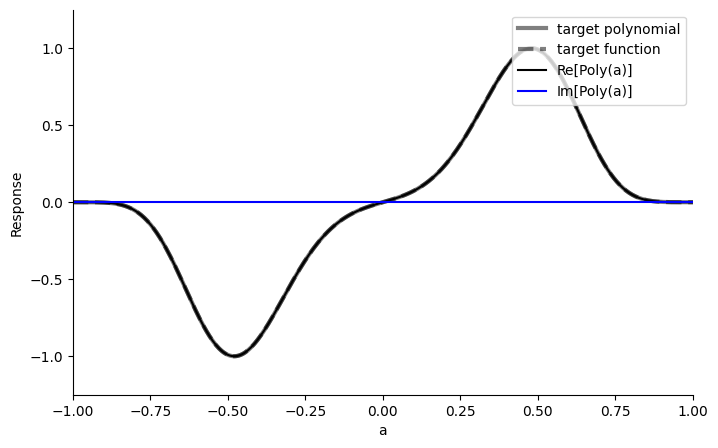

In [15]:
response.PlotQSPResponse(
    np.append(phiset_odd, []), pcoefs=poly_odd, target=lambda x: POLY_MAX_SCALE * POLY_ODD(x)
)